In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Dense, Dropout,Input, Activation, Layer
from keras.models import Sequential, Model
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("covtype.csv")

In [3]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
dataset.shape

(581012, 55)

In [5]:
#check for null values
dataset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


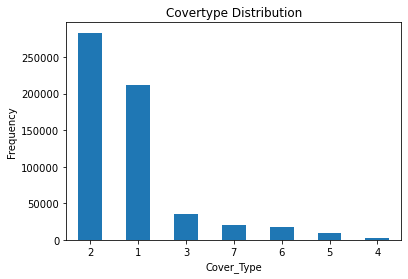

In [133]:
count_classes = pd.value_counts(dataset['Cover_Type'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Covertype Distribution")
plt.xlabel("Cover_Type")
plt.ylabel("Frequency")
plt.savefig("Covertype Distribution")
plt.show()

In [7]:
y = dataset.iloc[:,-1].values
x = dataset.drop(["Cover_Type"],axis=1)
x.shape,y.shape

((581012, 54), (581012,))

In [8]:
cov1 = dataset[dataset['Cover_Type']==1]
cov2 = dataset[dataset['Cover_Type']==2]
cov3 = dataset[dataset['Cover_Type']==3]
cov4 = dataset[dataset['Cover_Type']==4]
cov5 = dataset[dataset['Cover_Type']==5]
cov6 = dataset[dataset['Cover_Type']==6]
cov7 = dataset[dataset['Cover_Type']==7]
print(cov1.shape,cov2.shape,cov3.shape,cov4.shape,cov5.shape,cov6.shape,cov7.shape)

(211840, 55) (283301, 55) (35754, 55) (2747, 55) (9493, 55) (17367, 55) (20510, 55)


In [9]:
# Implementing Undersampling for Handling Imbalanced 
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res=nm.fit_sample(x,y)

In [10]:
X_res.shape,y_res.shape

((19229, 54), (19229,))

In [11]:
X_res

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2466,354,20,0,0,807,182,201,153,1463,...,0,0,1,0,0,0,0,0,0,0
1,2531,23,9,42,0,735,215,221,142,890,...,0,0,0,0,0,0,0,0,0,0
2,2533,36,4,30,0,750,220,230,147,860,...,0,0,0,0,0,0,0,0,0,0
3,2530,20,6,30,-3,742,216,228,149,875,...,0,0,0,0,0,0,0,0,0,0
4,2470,309,10,0,0,828,193,234,181,1455,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,3290,334,22,277,64,1905,163,204,177,467,...,0,0,0,0,0,0,0,0,1,0
19225,3284,47,24,808,188,1253,220,182,84,1816,...,0,0,0,0,0,0,0,0,0,1
19226,3412,328,38,277,152,1054,103,166,186,1577,...,0,0,0,0,0,0,0,0,1,0
19227,3271,286,12,342,113,930,186,240,194,2255,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X_res.to_numpy()

array([[2466,  354,   20, ...,    0,    0,    0],
       [2531,   23,    9, ...,    0,    0,    0],
       [2533,   36,    4, ...,    0,    0,    0],
       ...,
       [3412,  328,   38, ...,    0,    1,    0],
       [3271,  286,   12, ...,    0,    1,    0],
       [3395,   34,   10, ...,    0,    0,    1]], dtype=int64)

In [13]:
X_res.shape

(19229, 54)

In [14]:
#Feature Scaling
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_res)

In [15]:
#spliting the dataset into train and test set

x_train,x_test,y_train,y_test= train_test_split(x_scaled,y_res,test_size = 0.1, random_state = 0)
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(13844, 54)
(1923, 54)
(3462, 54)


In [19]:
input_data = Input(shape=(54,))
encoded = Dense(3, activation='relu')(input_data)
decoded = Dense(54, activation='sigmoid')(encoded)

In [20]:
autoencoder = Model(input_data, decoded)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 54)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 165       
_________________________________________________________________
dense_2 (Dense)              (None, 54)                216       
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=512,
                shuffle=True,
                validation_data=(x_val, x_val))

Train on 13844 samples, validate on 3462 samples
Epoch 1/200
13844/13844 [==============================] - 0s 11us/step - loss: 0.2142 - accuracy: 0.0022 - val_loss: 0.2095 - val_accuracy: 0.0014
Epoch 2/200
13844/13844 [==============================] - 0s 5us/step - loss: 0.2041 - accuracy: 0.0022 - val_loss: 0.1962 - val_accuracy: 0.0043
Epoch 3/200
13844/13844 [==============================] - 0s 5us/step - loss: 0.1868 - accuracy: 0.0040 - val_loss: 0.1743 - val_accuracy: 0.0046
Epoch 4/200
13844/13844 [==============================] - 0s 5us/step - loss: 0.1618 - accuracy: 0.0040 - val_loss: 0.1464 - val_accuracy: 0.0046
Epoch 5/200
13844/13844 [==============================] - 0s 5us/step - loss: 0.1322 - accuracy: 0.0040 - val_loss: 0.1153 - val_accuracy: 0.0046
Epoch 6/200
13844/13844 [==============================] - 0s 5us/step - loss: 0.1019 - accuracy: 0.0040 - val_loss: 0.0876 - val_accuracy: 0.0046
Epoch 7/200
13844/13844 [==============================] - 0s 5us/st

13844/13844 [==============================] - 0s 5us/step - loss: 0.0219 - accuracy: 0.6003 - val_loss: 0.0219 - val_accuracy: 0.6167
Epoch 57/200
13844/13844 [==============================] - 0s 4us/step - loss: 0.0217 - accuracy: 0.6094 - val_loss: 0.0218 - val_accuracy: 0.6277
Epoch 58/200
13844/13844 [==============================] - 0s 4us/step - loss: 0.0215 - accuracy: 0.6146 - val_loss: 0.0216 - val_accuracy: 0.6337
Epoch 59/200
13844/13844 [==============================] - 0s 4us/step - loss: 0.0214 - accuracy: 0.6258 - val_loss: 0.0215 - val_accuracy: 0.6441
Epoch 60/200
13844/13844 [==============================] - 0s 4us/step - loss: 0.0213 - accuracy: 0.6357 - val_loss: 0.0213 - val_accuracy: 0.6502
Epoch 61/200
13844/13844 [==============================] - 0s 5us/step - loss: 0.0211 - accuracy: 0.6448 - val_loss: 0.0212 - val_accuracy: 0.6626
Epoch 62/200
13844/13844 [==============================] - 0s 6us/step - loss: 0.0210 - accuracy: 0.6542 - val_loss: 0.0211 

13844/13844 [==============================] - 0s 5us/step - loss: 0.0160 - accuracy: 0.9287 - val_loss: 0.0161 - val_accuracy: 0.9255
Epoch 167/200
13844/13844 [==============================] - 0s 5us/step - loss: 0.0160 - accuracy: 0.9286 - val_loss: 0.0161 - val_accuracy: 0.9258
Epoch 168/200
13844/13844 [==============================] - 0s 5us/step - loss: 0.0160 - accuracy: 0.9292 - val_loss: 0.0161 - val_accuracy: 0.9263
Epoch 169/200
13844/13844 [==============================] - 0s 4us/step - loss: 0.0159 - accuracy: 0.9294 - val_loss: 0.0160 - val_accuracy: 0.9263
Epoch 170/200
13844/13844 [==============================] - 0s 4us/step - loss: 0.0159 - accuracy: 0.9289 - val_loss: 0.0160 - val_accuracy: 0.9266
Epoch 171/200
13844/13844 [==============================] - 0s 4us/step - loss: 0.0159 - accuracy: 0.9297 - val_loss: 0.0160 - val_accuracy: 0.9266
Epoch 172/200
13844/13844 [==============================] - 0s 4us/step - loss: 0.0158 - accuracy: 0.9298 - val_loss: 0

In [23]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)

1923/1923 [==============================] - 0s 21us/step
Loss: 0.01477510105160821
Accuracy 93.75975131988525


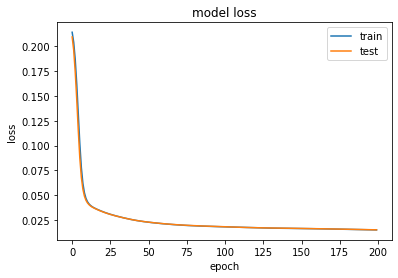

In [135]:
# Plot training loss and validation split loss over the epochs
#print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('simpleAE_model_loss.png')
plt.show()

In [25]:
evaluation = autoencoder.evaluate(x_test, x_test)
print("Loss:",evaluation)
data = autoencoder.predict(x_test)

1923/1923 [==============================] - 0s 20us/step
Loss: [0.01477510105160821, 0.9375975131988525]


In [26]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [27]:
latent_vector.shape

(1923, 3)

In [28]:
latent_vector

array([[6.5550847 , 0.56833637, 5.407356  ],
       [5.6174726 , 5.2263365 , 2.8003237 ],
       [1.608909  , 5.8244143 , 5.000324  ],
       ...,
       [0.        , 7.094631  , 3.820628  ],
       [5.4272466 , 0.3598647 , 4.5224156 ],
       [0.        , 7.591859  , 4.3734136 ]], dtype=float32)

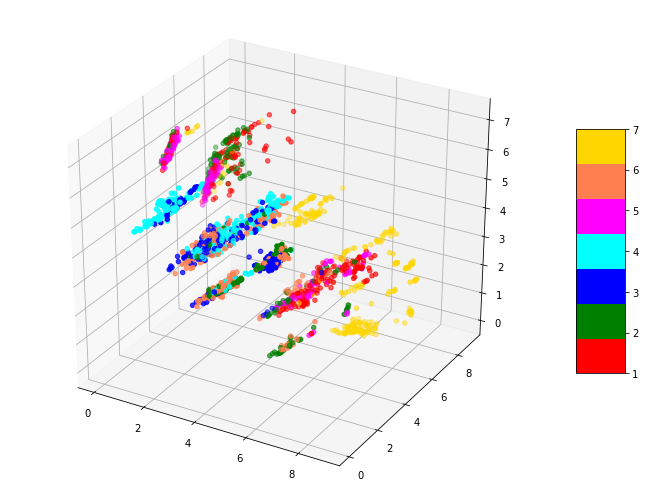

In [134]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','green','blue','cyan','magenta','coral','gold']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('simpleAE_3d.png')
plt.show()

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.7779511180447218 and k :  [4]


In [110]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.5626625065002601
Mean Squared Error: 1.7888715548621945
Root Mean Squared Error: 1.3374870297921377
[[211  12   0   0  45   0   1]
 [ 14 211  10   3  10  21   0]
 [  0  12 182  42   0  31   0]
 [  0   8  52 189   0  17   0]
 [ 30   9   0   0 247   0   0]
 [  2  33  45  27   1 166   0]
 [  2   0   0   0   0   0 290]]
              precision    recall  f1-score   support

           1       0.81      0.78      0.80       269
           2       0.74      0.78      0.76       269
           3       0.63      0.68      0.65       267
           4       0.72      0.71      0.72       266
           5       0.82      0.86      0.84       286
           6       0.71      0.61      0.65       274
           7       1.00      0.99      0.99       292

    accuracy                           0.78      1923
   macro avg       0.78      0.77      0.77      1923
weighted avg       0.78      0.78      0.78      1923

